<a href="https://colab.research.google.com/github/shahad-jeza/kaust_training/blob/main/summer_basic_code/VAEs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question

In [ ]:
# One-Hour VAE Practical

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader

# Task 1: Data Preparation (5 minutes)
# Use the provided code to load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

# Task 2: Implement a Simple VAE (25 minutes)
class SimpleVAE(nn.Module):
    def __init__(self, latent_dim):
        super(SimpleVAE, self).__init__()
        # TODO: Implement the encoder (input -> latent)
        # TODO: Implement the decoder (latent -> output)

    def encode(self, x):
        # TODO: Return mean and log variance of the latent space
        pass

    def decode(self, z):
        # TODO: Decode latent vector to image
        pass

    def reparameterize(self, mu, logvar):
        # TODO: Implement the reparameterization trick
        pass

    def forward(self, x):
        # TODO: Implement the forward pass
        pass

# Task 3: Loss Function and Training (20 minutes)
def loss_function(recon_x, x, mu, logvar):
    # TODO: Implement VAE loss (reconstruction + KL divergence)
    pass

def train(model, train_loader, optimizer, epochs=5):
    # TODO: Implement the training loop
    pass

# Task 4: Train and Visualize (10 minutes)
vae = SimpleVAE(latent_dim=20)
optimizer = optim.Adam(vae.parameters())
train(vae, train_loader, optimizer)

# TODO: Generate and visualize some reconstructed images
# TODO: Generate some new images from random latent vectors



---



# Solution

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader

In [2]:
# Task 1: Data Preparation
# load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 59433863.71it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 2096135.90it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 14935098.24it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 8239848.08it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [19]:
# Task 2: Implement a Simple VAE
class SimpleVAE(nn.Module):
    def __init__(self, latent_dim):
        super(SimpleVAE, self).__init__()
        self.latent_dim = latent_dim
        # TODO: Implement the encoder (input -> latent)
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 400),
            nn.ReLU(),
            nn.Linear(400, latent_dim * 2)
        )

        # TODO: Implement the decoder (latent -> output)
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 400),
            nn.ReLU(),
            nn.Linear(400, 28 * 28),
            nn.Sigmoid()
        )

    def encode(self, x):
        # TODO: Return mean and log variance of the latent space
        x = x.view(-1, 28 * 28)
        h = self.encoder(x)
        mu, logvar = h.chunk(2, dim=1)
        return mu, logvar

    def decode(self, z):
        # TODO: Decode latent vector to image
        return self.decoder(z)

    def reparameterize(self, mu, logvar):
        # TODO: Implement the reparameterization trick
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        # TODO: Implement the forward pass
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

In [20]:
# Task 3: Loss Function
def loss_function(recon_x, x, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(recon_x, x.view(-1, 28*28), reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

In [25]:
def train(model, train_loader, optimizer, epochs=15):
    # TODO: Implement the training loop
    model.train()

    for epoch in range(epochs):
        train_loss = 0
        for batch_idx, (data, _) in enumerate(train_loader):
            optimizer.zero_grad()
            recon_batch, mu, logvar = model(data)
            loss = loss_function(recon_batch, data, mu, logvar)
            loss.backward()
            train_loss += loss.item()
            optimizer.step()

        print(f'Epoch {epoch+1}/{epochs}, Loss: {train_loss / len(train_loader.dataset):.4f}')




In [26]:
# Task 4: Train and Visualize (10 minutes)
vae = SimpleVAE(latent_dim=20)
optimizer = optim.Adam(vae.parameters())
train(vae, train_loader, optimizer)

Epoch 1/15, Loss: 164.9478
Epoch 2/15, Loss: 122.2481
Epoch 3/15, Loss: 114.7583
Epoch 4/15, Loss: 111.7107
Epoch 5/15, Loss: 109.9127
Epoch 6/15, Loss: 108.6900
Epoch 7/15, Loss: 107.8383
Epoch 8/15, Loss: 107.2152
Epoch 9/15, Loss: 106.6107
Epoch 10/15, Loss: 106.1957
Epoch 11/15, Loss: 105.8190
Epoch 12/15, Loss: 105.4394
Epoch 13/15, Loss: 105.2423
Epoch 14/15, Loss: 104.9486
Epoch 15/15, Loss: 104.6953


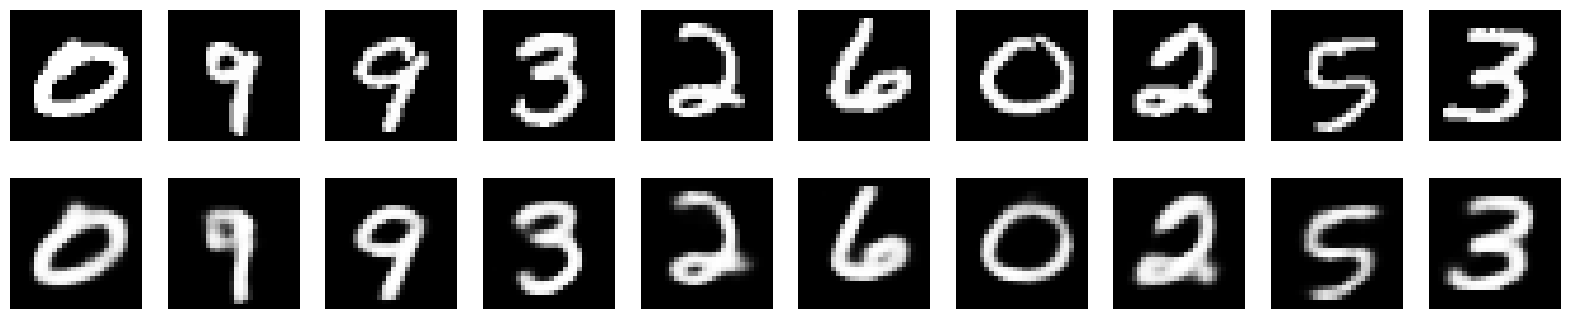

In [27]:
# TODO: Generate and visualize some reconstructed images

# Visualize reconstructed images
import matplotlib.pyplot as plt

def visualize_reconstruction(model, data):
    model.eval()
    with torch.no_grad():
        recon_data, _, _ = model(data)

    fig, axes = plt.subplots(2, 10, figsize=(20, 4))
    for i in range(10):
        axes[0, i].imshow(data[i].squeeze().numpy(), cmap='gray')
        axes[0, i].axis('off')
        axes[1, i].imshow(recon_data[i].view(28, 28).numpy(), cmap='gray')
        axes[1, i].axis('off')
    plt.show()

# Get a batch of test images
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=True)
test_data = next(iter(test_loader))[0]

visualize_reconstruction(vae, test_data)


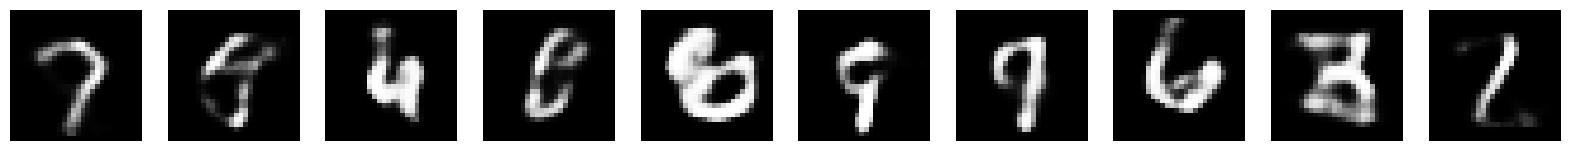

In [28]:
# TODO: Generate some new images from random latent vectors

# Generate new images
def generate_images(model, num_images=10):
    model.eval()
    with torch.no_grad():
        z = torch.randn(num_images, model.latent_dim)
        generated = model.decode(z)

    fig, axes = plt.subplots(1, num_images, figsize=(20, 2))
    for i in range(num_images):
        axes[i].imshow(generated[i].view(28, 28).numpy(), cmap='gray')
        axes[i].axis('off')
    plt.show()

generate_images(vae)